# Denoising Autoencoders
#### [_Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion_  - Vincent et al. 2010](http://dl.acm.org/citation.cfm?id=1953039)

This work is absolutely not an effort to reproduce exact results of the cited paper, nor I confine my implementations to suggestion of the original authors. With this implementation I aim to widen my own understanding of the original work. Use this code with no warranty and please respect the accompanying license.

In [1]:
# Imports
%reload_ext autoreload
%autoreload 1

import os, sys
sys.path.append('../')
sys.path.append('../common')
sys.path.append('../GenerativeModels')

from tools_general import tf, np
from IPython.display import Image
from tools_train import vis_square
from tools_config import data_dir
from tools_train import get_train_params, plot_latent_variable
import matplotlib.pyplot as plt
import imageio
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# define parameters
networktype = 'CDAE_MNIST'

work_dir = '../trained_models/%s/' %networktype
if not os.path.exists(work_dir): os.makedirs(work_dir)

### Network definitions

In [3]:
from CDAE import create_encoder, create_decoder, create_cdae_trainer

# Training CDAE
You can either get the fully trained models from [my google drive](https://goo.gl/7PrKD2) or train your own models using the CDAE.py script

# Experiments
Create demo networks and restore weights

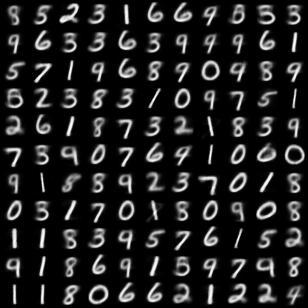

In [4]:
best_model = work_dir + "050_21879_model.ckpt"
best_img = work_dir + 'Epoch_050_Iter_21879.jpg'
Image(filename=best_img)

In [5]:
latentD = 2
batch_size = 128

tf.reset_default_graph() 
demo_sess = tf.InteractiveSession()

is_training = tf.placeholder(tf.bool, [], 'is_training')

Xph = tf.placeholder(tf.float32, [None, 28, 28, 1])

Xenc_op = create_encoder(Xph, is_training, latentD, reuse=False, networktype=networktype + '_Enc') 
Xrec_op = create_decoder(Xenc_op, is_training, latentD, reuse=False, networktype=networktype + '_Dec')
    
tf.global_variables_initializer().run()

Enc_varlist = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=networktype + '_Enc')    
Dec_varlist = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=networktype + '_Dec')
    
saver = tf.train.Saver(var_list=Enc_varlist+Dec_varlist)
saver.restore(demo_sess, best_model)

### Organization of the data on the latent space
Here we encode all the test set data and plot the corresponding 2D values. The color will repsent respective number.

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


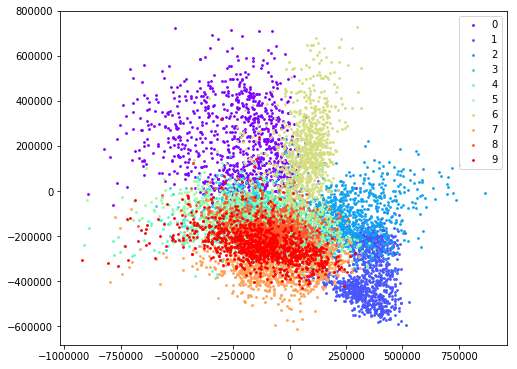

In [6]:
data = input_data.read_data_sets(data_dir, one_hot=False, reshape=False)
test_data, test_labels = data.test.next_batch(data.test.num_examples)
decoded_data = demo_sess.run(Xenc_op, feed_dict={Xph:test_data, is_training:False})
plot_latent_variable(decoded_data, test_labels)

### Generate new data
So CDAE is not a generative model per se and complex sampling methods exist that enable generating new data from their latent code. c.f. [Generalized Denoising Auto-Encoders as Generative Models](https://arxiv.org/abs/1305.6663)